In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement= Base.classes.measurement
station= Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
twelve_months=session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
# Calculate the date 1 year ago from the last data point in the database
year_ago=session.query(measurement.date).filter(measurement.date).order_by(measurement.date.desc()).first()
# Perform a query to retrieve the data and precipitation scores
last_year= session.query(measurement.prcp, measurement.date).order_by(measurement.date.desc())



In [11]:
#Save the query results 
date = []
precipitation = []
year_df = last_year.filter(measurement.date > '2016-08-23' )
for i in year_df:
    date.append([date])
    precipitation.append([precipitation])

In [12]:
df= pd.DataFrame(last_year,columns=['date','precipitation'])

Text(0, 0.5, 'Precipitation')

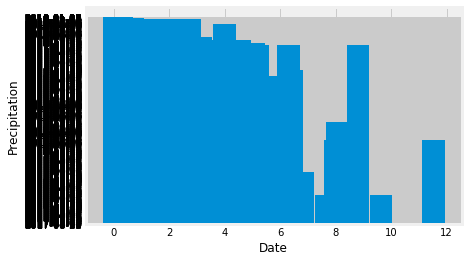

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
fig,ax=plt.subplots()
ax.bar(df['date'], df["precipitation"], align="center")
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Last 12 Months of Precipitation in Hawaii')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

date
count  18103.000000
mean       0.160644
std        0.468746
min        0.000000
25%        0.000000
50%        0.010000
75%        0.110000
max       11.530000

In [15]:
# Design a query to show how many stations are available in this dataset
session.query(station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
active_stations = session.query(measurement.station,measurement.tobs)

print(active_stations)
active_stations_df= pd.DataFrame(active_stations, columns=['station','tobs'])
active_stations_df['station'].value_counts()

SELECT measurement.station AS measurement_station, measurement.tobs AS measurement_tobs 
FROM measurement


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most=active_stations_df['station'].mode()
minimum=active_stations_df['tobs'].min()
maximum=active_stations_df['tobs'].max()
average_temp=active_stations_df['tobs'].mean()

print(minimum)
print(maximum)
print(average_temp)

53.0
87.0
73.09795396419437


Text(0.5, 1.0, 'Temperatures at the Weather Station Over One Year')

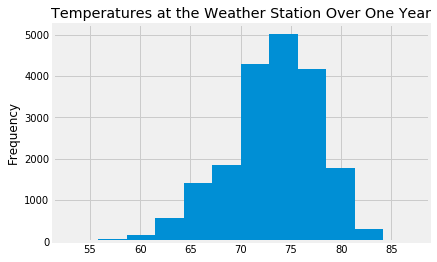

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_obs=session.query(measurement.date, measurement.tobs)
plt.hist(active_stations_df['tobs'],bins=12)
plt.ylabel('Frequency')
plt.title('Temperatures at the Weather Station Over One Year')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
